In [1]:
%matplotlib inline
import numpy as np
# import matplotlib.font_managermn as fm
import matplotlib.pyplot as plt
# 配置中文
# # 添加字体 
# fm.fontMnager.addfont('C:/Windows/Fonts/SimHei.ttf')
# 安装好字体后可以正常设置
plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是符号'-'显示为方块的问题

import pandas as pd
import re

d:\Anaconda_other\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
d:\Anaconda_other\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [80]:
k = [10, 15, 20, 25, 30, 35, 40, 45, 50]
pre_user = [0.1245, 0.1272, 0.125, 0.1249, 0.1224, 0.1257, 0.1301, 0.1277, 0.1259]
rec_user = [0.0762, 0.1168, 0.153, 0.1911, 0.2249, 0.2692, 0.3186, 0.3517, 0.3854]
cov_user = [0.7433, 0.8556, 0.9358, 0.9679, 0.9679, 0.9947, 0.9947, 1.0, 1.0]

pre_item = [0.1286, 0.1279, 0.1362, 0.1294, 0.1313, 0.1303, 0.1309, 0.1311, 0.1329]
rec_item = [0.0787, 0.1174, 0.1668, 0.198, 0.2411, 0.2792, 0.3204, 0.361, 0.4066]
cov_item = [0.861, 0.9251, 0.9572, 0.984, 0.984, 0.9947, 1.0, 1.0, 1.0]

a = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
pre_kg = [0.1362, 0.1337, 0.1342, 0.1327, 0.1352, 0.1423, 0.1418, 0.1321, 0.1255, 0.1224, 0.1219]
rec_kg = [0.1668, 0.1636, 0.1643, 0.1624, 0.1655, 0.1743, 0.1736, 0.1618, 0.1537, 0.1499, 0.1493]
cov_kg = [0.9572, 0.9519, 0.9626, 0.9572, 0.9733, 0.9786, 0.9679, 1.0, 0.984, 0.984, 0.984]

In [ ]:
cov_user = [value * 100 for value in cov_user]
cov_item = [value * 100 for value in cov_item]

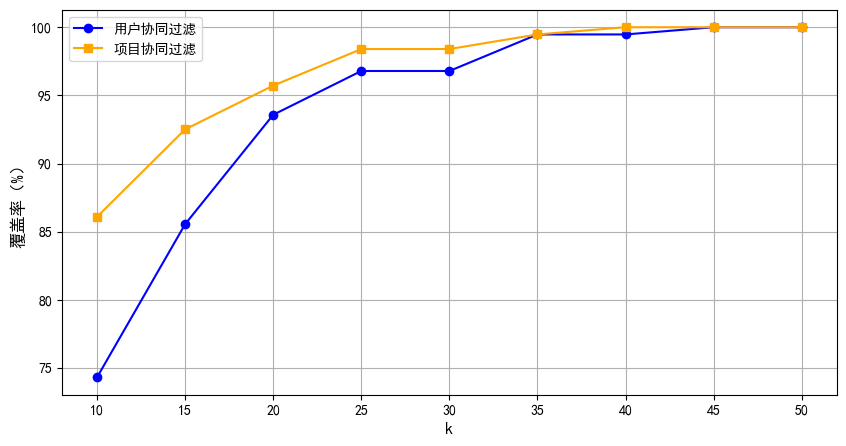

In [ ]:
# 创建图形
plt.figure(figsize=(10, 5))

# 绘制折线图
plt.plot(k, cov_user, marker='o', label='用户协同过滤', color='blue')  # pre_user的折线
plt.plot(k, cov_item, marker='s', label='项目协同过滤', color='orange')  # pre_item的折线

# 添加标题和标签
# plt.title('Line Chart of pre_user and pre_item')
plt.xlabel('k', fontsize=12)
plt.ylabel('覆盖率（%）', fontsize=12)

# 添加图例
plt.legend()

# 显示网格
plt.grid()

# 显示图形
plt.show()

In [98]:
# 将值放大100倍
pre_user = [value * 100 for value in pre_user]
pre_item = [value * 100 for value in pre_item]
rec_user = [value * 100 for value in rec_user]
rec_item = [value * 100 for value in rec_item]

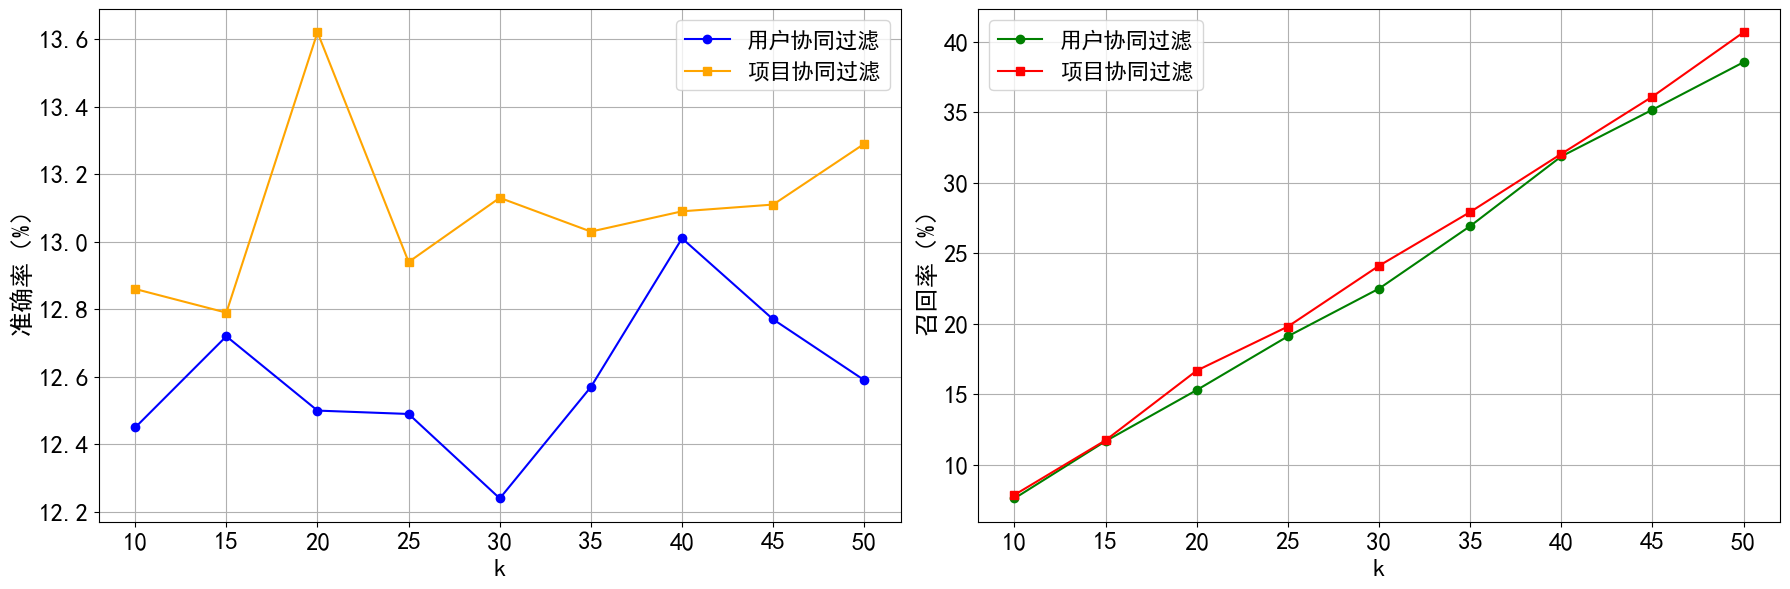

In [99]:
# 创建包含2个子图的图形
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# 第一张子图
axs[0].plot(k, pre_user, marker='o', label='用户协同过滤', color='blue')
axs[0].plot(k, pre_item, marker='s', label='项目协同过滤', color='orange')
# axs[0].set_title('First Plot: pre_user and pre_item')
axs[0].set_xlabel('k', fontsize=18)
axs[0].set_ylabel('准确率（%）', fontsize=18)
axs[0].legend(fontsize=16)
axs[0].grid()
axs[0].tick_params(axis='x', labelsize=18)  # 设置横坐标数字的字体大小
axs[0].tick_params(axis='y', labelsize=18)  

# 第二张子图
axs[1].plot(k, rec_user, marker='o', label='用户协同过滤', color='green')
axs[1].plot(k, rec_item, marker='s', label='项目协同过滤', color='red')
# axs[1].set_title('Second Plot: rec_user and rec_item')
axs[1].set_xlabel('k', fontsize=18)
axs[1].set_ylabel('召回率（%）', fontsize=18)
axs[1].legend(fontsize=16)
axs[1].grid()
axs[1].tick_params(axis='x', labelsize=18)  # 设置横坐标数字的字体大小
axs[1].tick_params(axis='y', labelsize=18)  

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

In [81]:
# 将值放大100倍
pre_kg = [value * 100 for value in pre_kg]
rec_kg = [value * 100 for value in rec_kg]
cov_kg = [value * 100 for value in cov_kg]

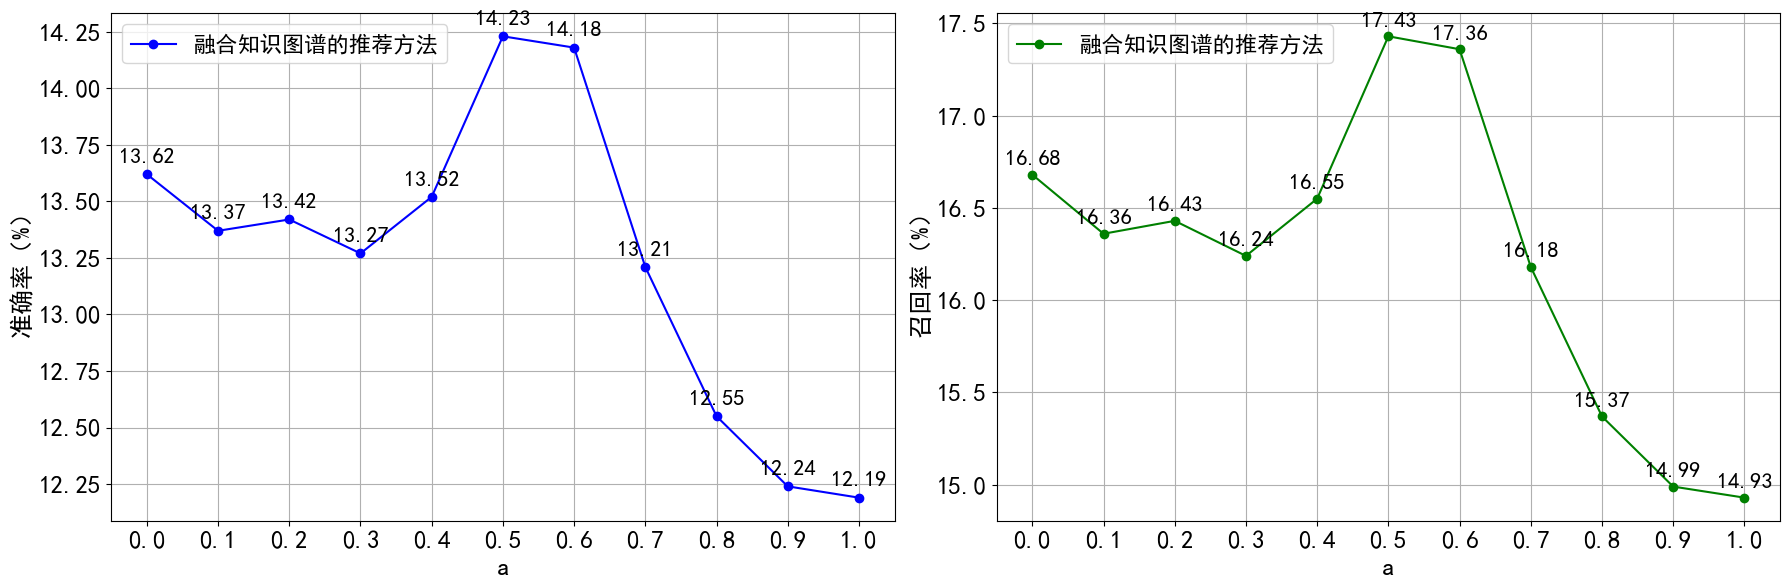

In [96]:
# 创建包含2个子图的图形
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# 第一张子图：准确率
axs[0].plot(a, pre_kg, marker='o', label='融合知识图谱的推荐方法', color='blue')
axs[0].set_xlabel('a', fontsize=18)
axs[0].set_ylabel('准确率（%）', fontsize=18)
axs[0].legend(fontsize=16)
axs[0].grid()
axs[0].tick_params(axis='x', labelsize=18)  # 设置横坐标数字的字体大小
axs[0].tick_params(axis='y', labelsize=18)

# 添加数据标注，保留两位小数
for i, value in enumerate(pre_kg):
    axs[0].text(a[i], value+0.04, f"{value:.2f}", fontsize=16, ha='center', va='bottom')

# 设置坐标轴范围和刻度
axs[0].set_xticks(np.arange(0, 1.1, 0.1))

# 第二张子图：召回率
axs[1].plot(a, rec_kg, marker='o', label='融合知识图谱的推荐方法', color='green')
axs[1].set_xlabel('a', fontsize=18)
axs[1].set_ylabel('召回率（%）', fontsize=18)
axs[1].legend(fontsize=16)
axs[1].grid()
axs[1].tick_params(axis='x', labelsize=18)  # 设置横坐标数字的字体大小
axs[1].tick_params(axis='y', labelsize=18)

# 添加数据标注，保留两位小数
for i, value in enumerate(rec_kg):
    axs[1].text(a[i], value+0.04, f"{value:.2f}", fontsize=16, ha='center', va='bottom')

# 设置坐标轴范围和刻度
axs[1].set_xticks(np.arange(0, 1.1, 0.1))

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()


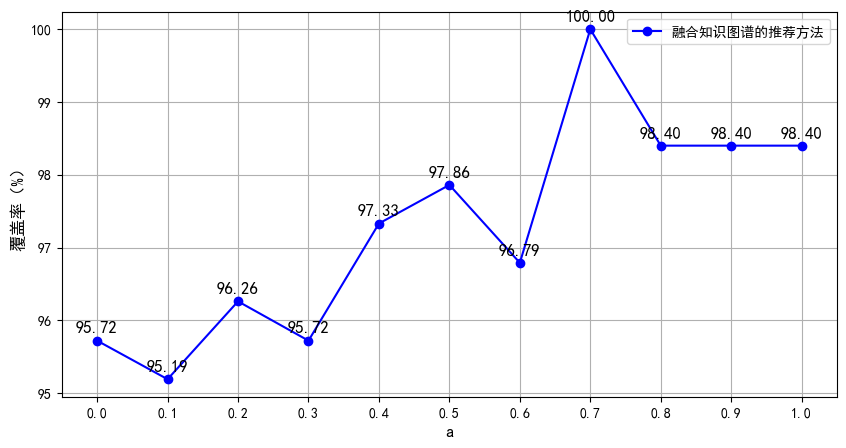

In [85]:
# 创建图形
plt.figure(figsize=(10, 5))

# 绘制折线图
plt.plot(a, cov_kg, marker='o', label='融合知识图谱的推荐方法', color='blue')  

# 添加标题和标签
# plt.title('Line Chart of pre_user and pre_item')
plt.xlabel('a', fontsize=12)
plt.ylabel('覆盖率（%）', fontsize=12)

# 添加数据标注，保留两位小数
for i, value in enumerate(cov_kg):
    plt.text(a[i], value+0.08, f"{value:.2f}", fontsize=12, ha='center', va='bottom')

plt.xticks(np.arange(0, 1.1, 0.1))

# 添加图例
plt.legend()

# 显示网格
plt.grid()

# 显示图形
plt.show()